Loading the required Library Packages

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


Reading and exploring the Health Care Dataset

In [7]:
data=pd.read_excel("health care diabetes.xlsx")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# checking the no. of rows and columns of the dataset
data.shape

(768, 9)

In [9]:
# dataset information overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# summary statistics for the Diabetes Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Preprocessing: Treating the Missing Values

In this dataset, 0 represents the null values, and hence we will replace 0 by mean of their feature (variable)

In [11]:
data["Glucose"].mean()

120.89453125

In [12]:
#identifying the mean of the features
print(data["Glucose"].mean())
print(data["BloodPressure"].mean())
print(data["SkinThickness"].mean())
print(data["Insulin"].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [13]:
#Finding the no. of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print("BloodPressure-",len(data["BloodPressure"][data["BloodPressure"]==0]))
print("SkinThickness-",len(data["SkinThickness"][data["SkinThickness"]==0]))
print("Insulin-",len(data["Insulin"][data["Insulin"]==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [14]:
#Finding the null value percentage
selected_columns = ['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage = (data[selected_columns]== 0).mean()* 100

#Displaying the null value percentage for each selected column
print('Percentage of null values for each column:')
print(null_percentage)

Percentage of null values for each column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [15]:
# Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data['BMI']=data['BMI'].replace([0],[data['BMI'].mean()])


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
selected_columns = ['Glucose','BloodPressure','SkinThickness','Insulin']


In [20]:
#checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

#Displaying the null value percentage for each selected column
print('Percentage of null values for each column after the null value treatment:')
print(null_percentage_treated)

Percentage of null values for each column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


Detecting Outliers and Treatment

In [21]:
columns = data[selected_columns]

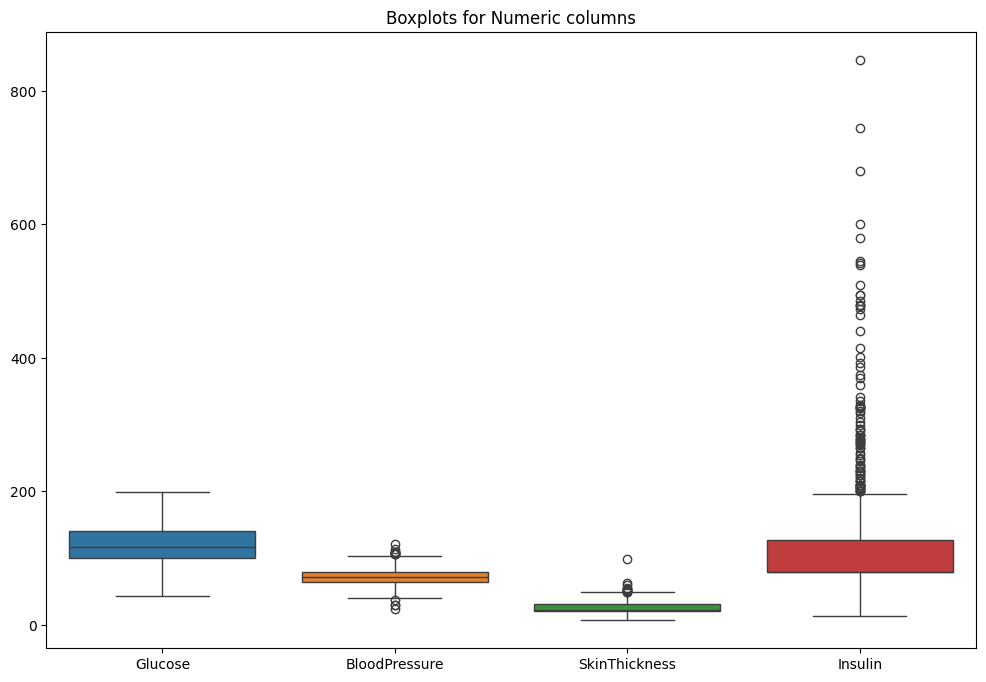

In [22]:
#Display boxplot for numeric columns to visualize outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric columns")
plt.show()

In [23]:
#Finding the Outlier Count in the selected columns:
def find_outliers_iqr(data, column_name):
    #calculate the first quantile(Q1) and third quantile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    #calculate the Lower and upper bound for outliers
    IQR = Q3 - Q1
    
    #Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 *  IQR
    upper_bound = Q3 + 1.5 *  IQR
    
    #find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    #count the number of outliers
    count_outliers = len(outliers)
    
    return count_outliers

# calculate and print the no. of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


Outlier Treatment

In [24]:
sorted(data)
Q1 = data.quantile(0.20)
Q3 = data.quantile(0.80)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [25]:
data_cleared_iqr = data[~((data <(Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [26]:
data_cleared_iqr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [27]:
col = data_cleared_iqr[["Glucose","BloodPressure","SkinThickness","Insulin"]]

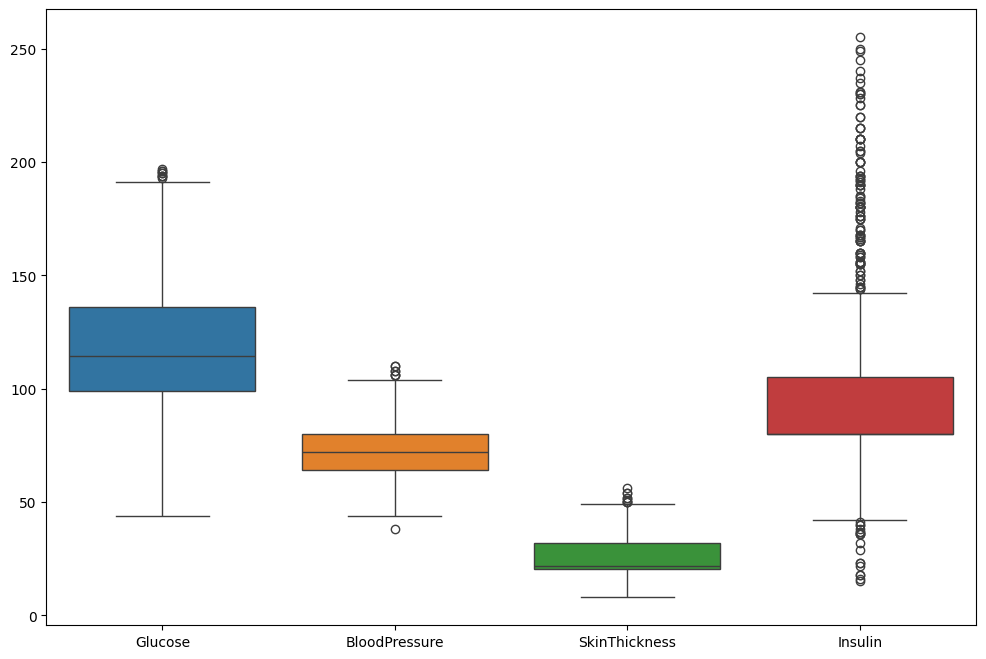

In [28]:
#checking the outliers after treatment using box polt
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

In [29]:
col.head()

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479


In [30]:
col.shape

(688, 4)

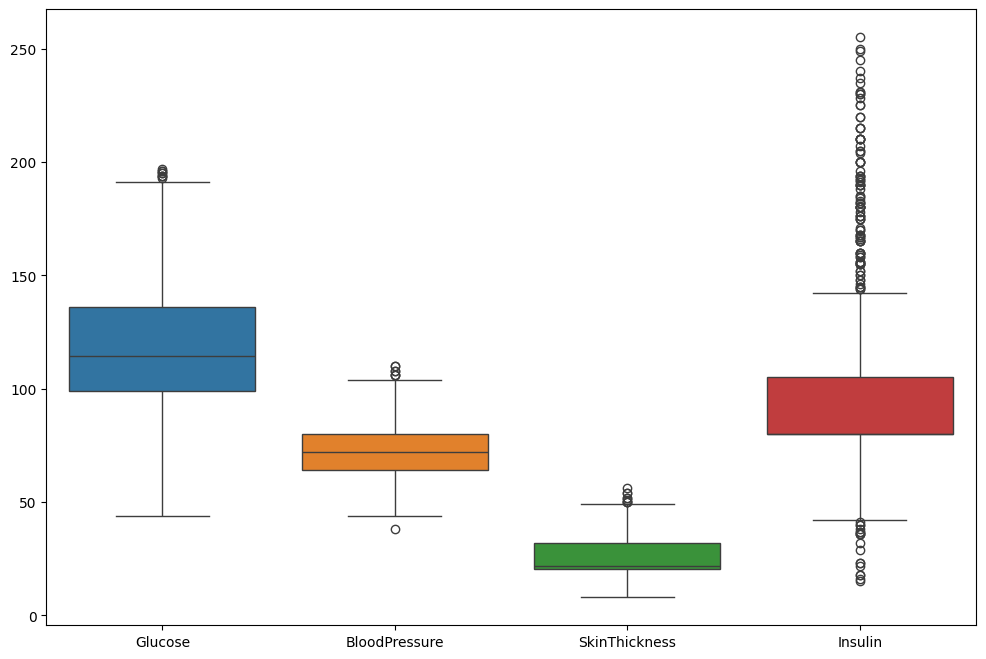

In [31]:
#checking the outliers after treatment using box polt
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

EDA - Visually exploring variables using histogram 

In [32]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


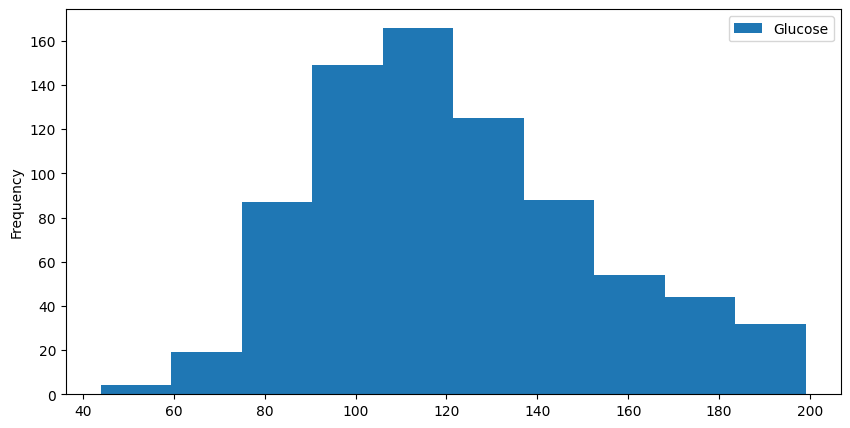

In [33]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

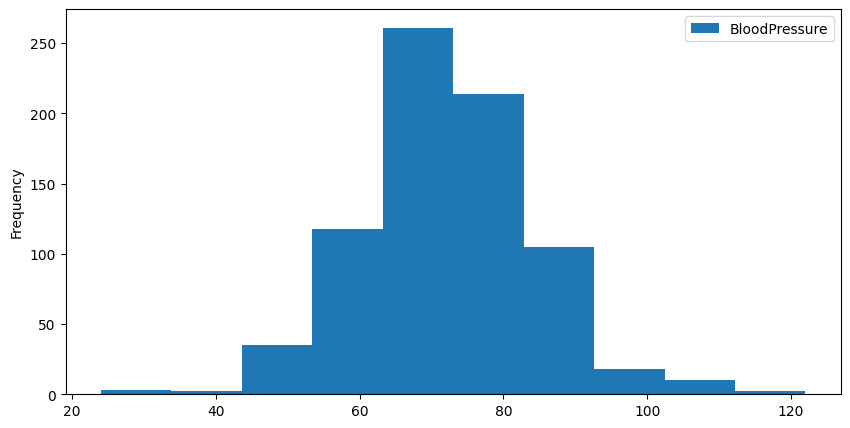

In [34]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

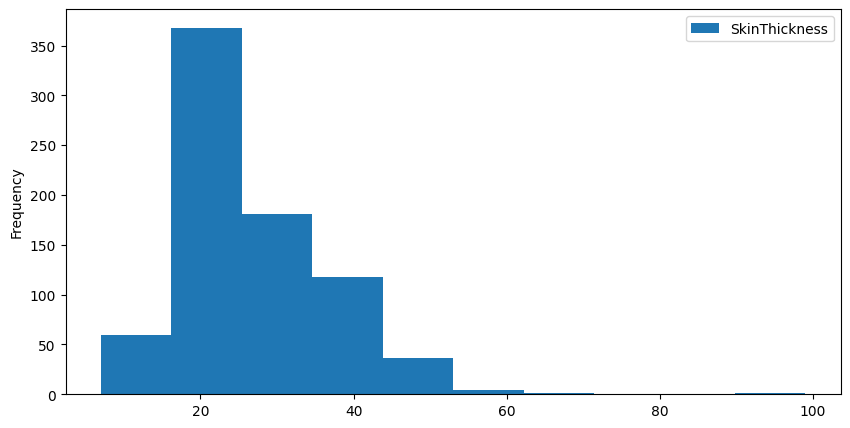

In [35]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

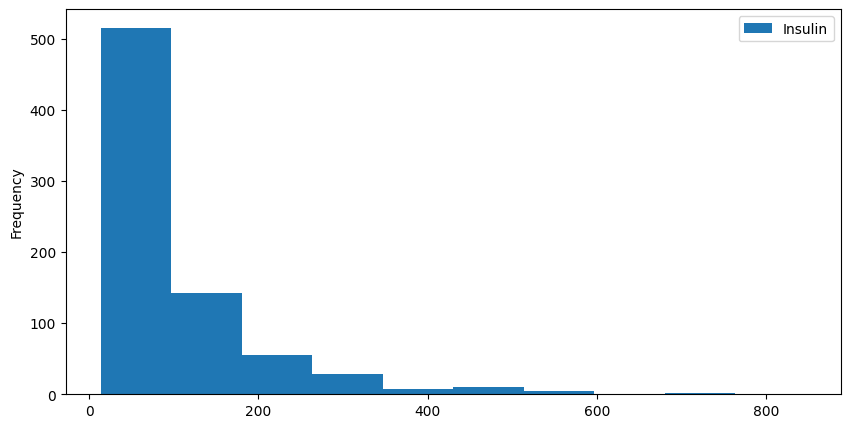

In [36]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

Violin plot for the selected features

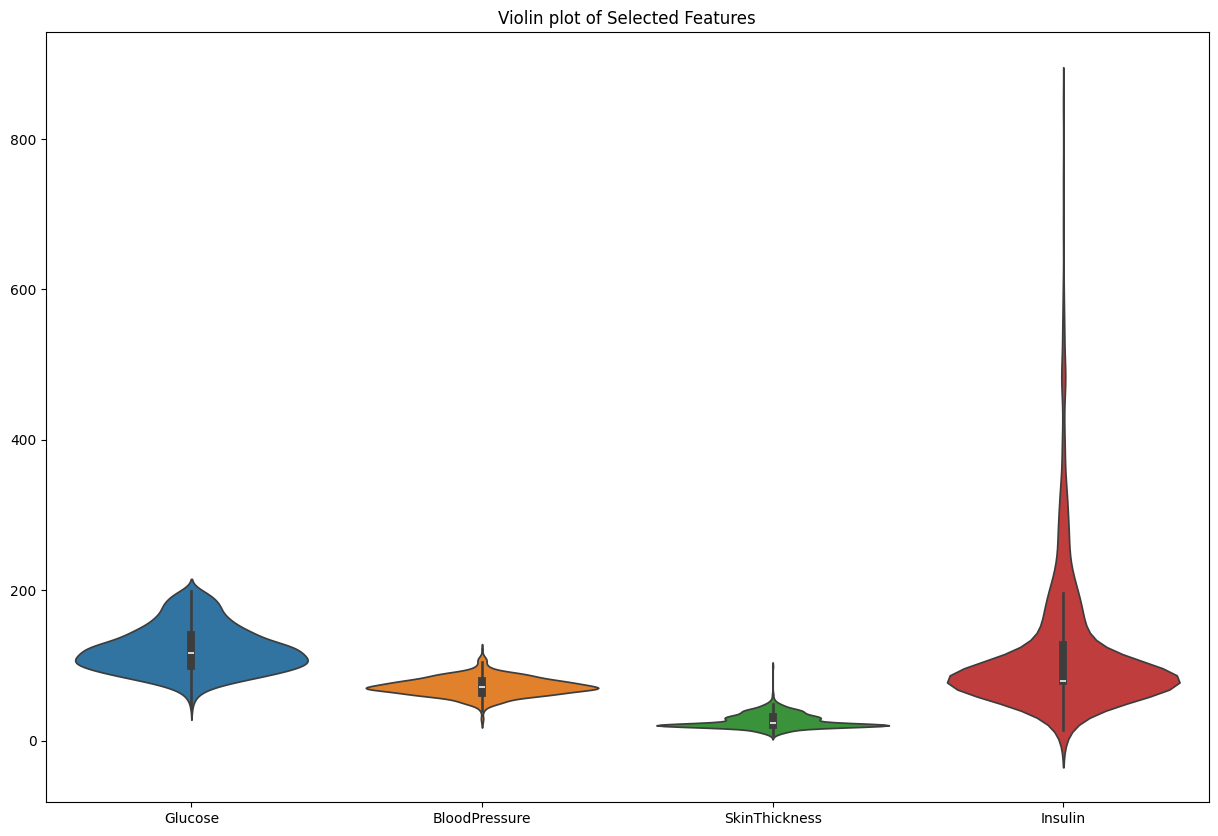

In [37]:
plt.figure(figsize=(15, 10))
sns.violinplot(data[selected_columns])
plt.title("Violin plot of Selected Features")
plt.show()

Kernel Density Estimation (KDE) plot for the selected features

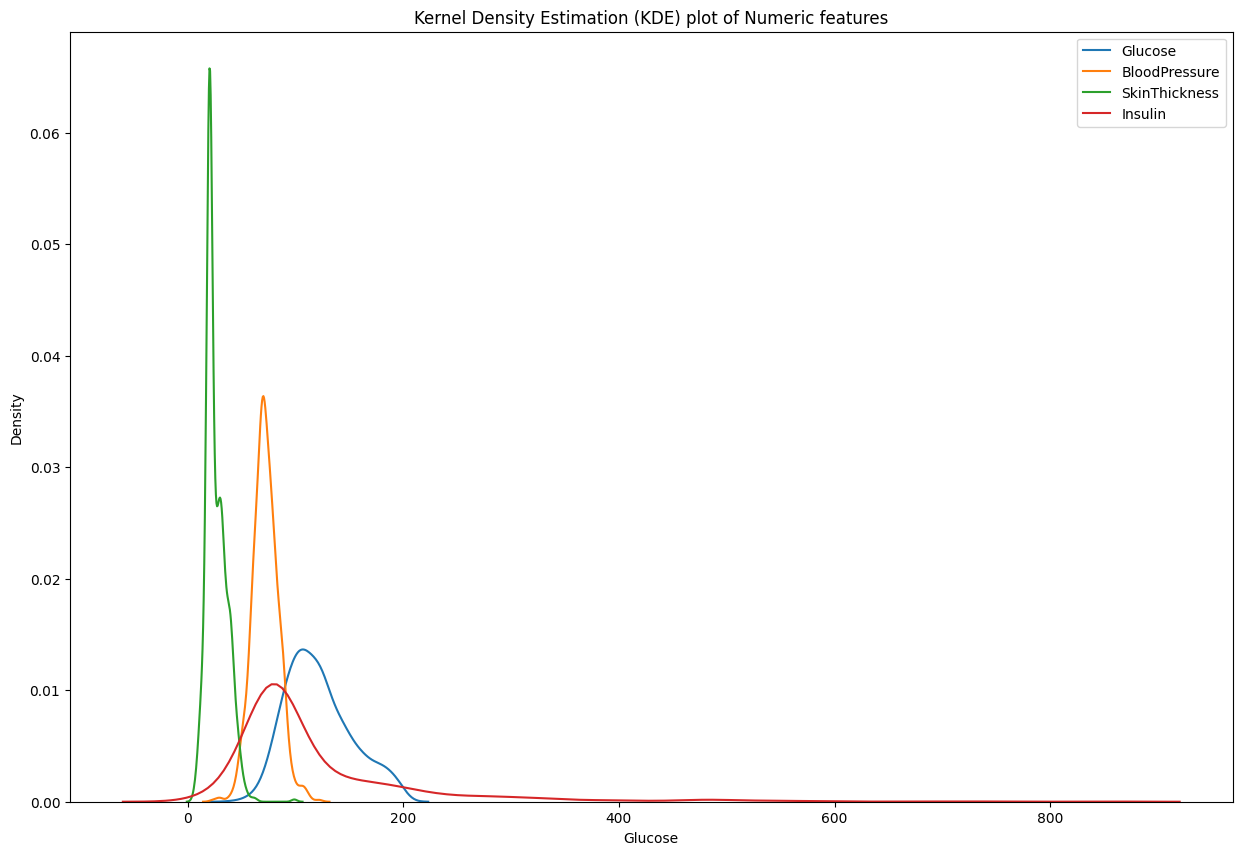

In [38]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) plot of Numeric features")
plt.legend()
plt.show()

Creating a count (Frequency) plot Describing the data types and the count of variables.

In [39]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [40]:
data.dtypes.value_counts()

float64    6
int64      3
Name: count, dtype: int64

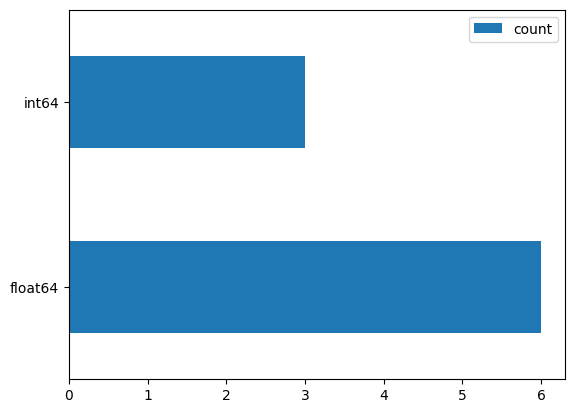

In [41]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

Data Exploration

In [42]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

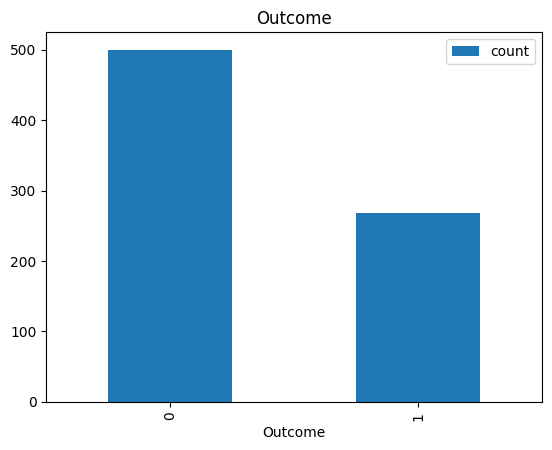

In [43]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [44]:
data['Outcome'].value_counts(1)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [45]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape) *100
outcome

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [46]:
balance_data= 100-outcome
balance_data

Outcome
0    34.895833
1    65.104167
Name: count, dtype: float64

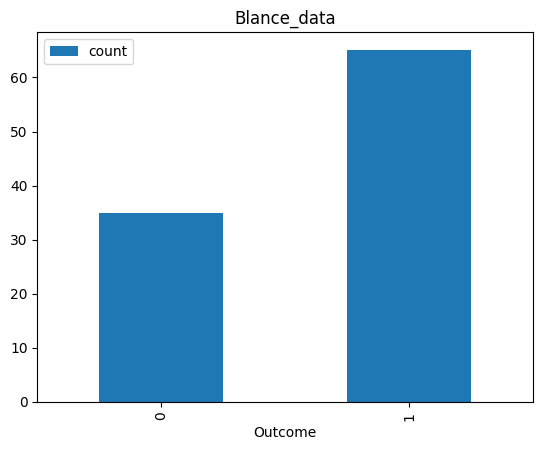

In [47]:
balance_data.plot(kind='bar')
plt.legend()
plt.title('Blance_data')
plt.show()

Bi-Variate Analysis

Creating scatter chartes between the pair of variables to understand the relationships.

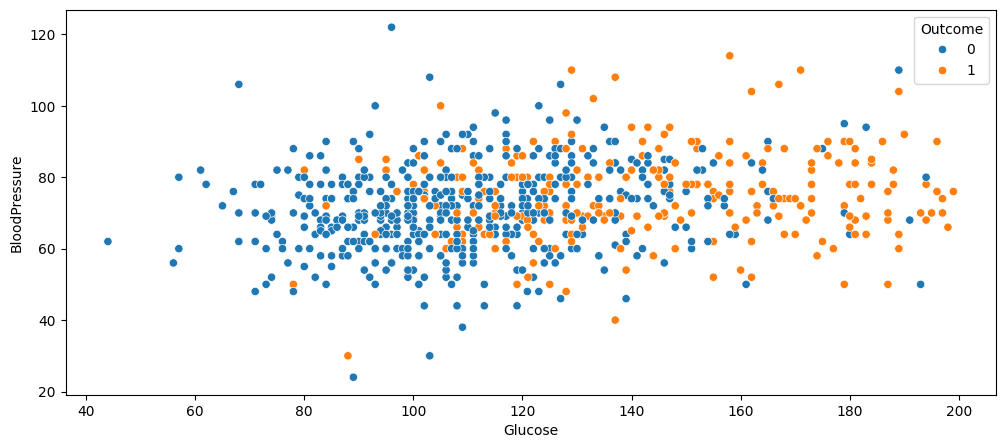

In [48]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

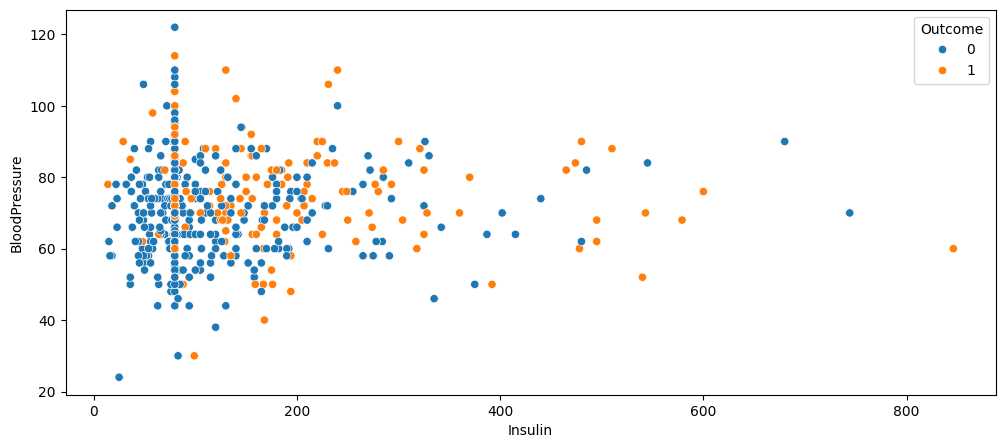

In [49]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Insulin',y='BloodPressure',hue='Outcome',data=data)
plt.show()

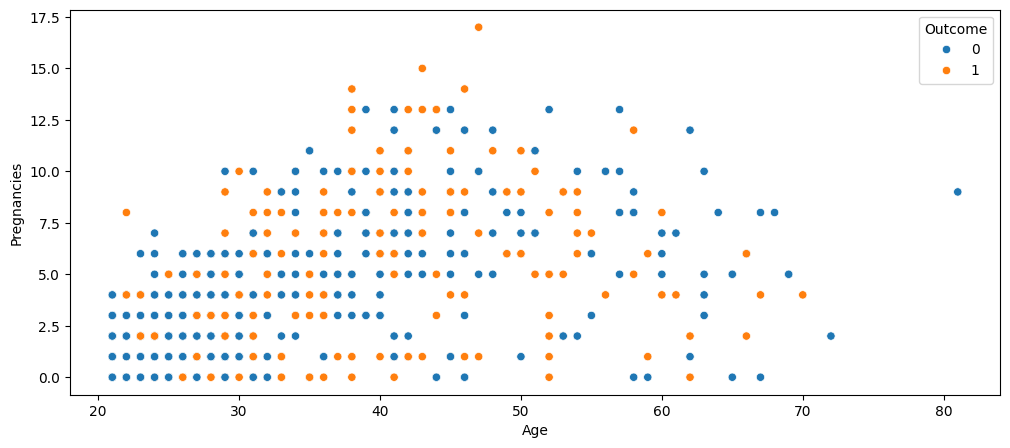

In [50]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

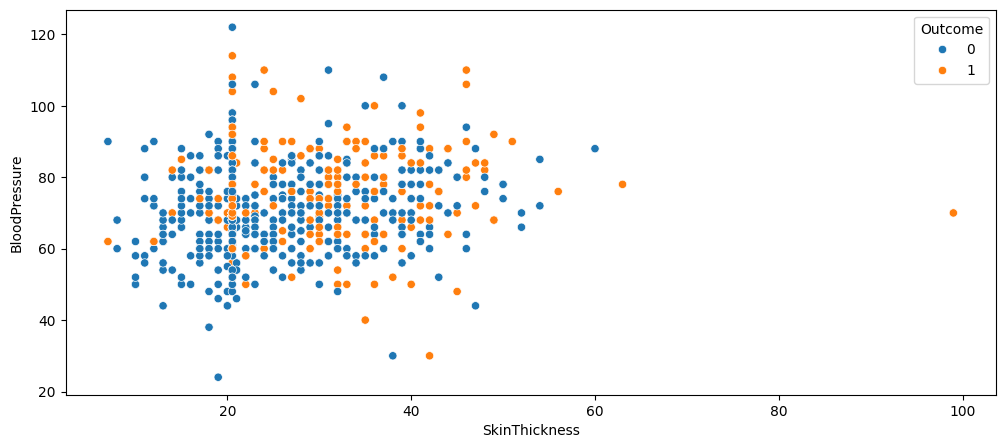

In [51]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='BloodPressure',hue='Outcome',data=data)
plt.show()

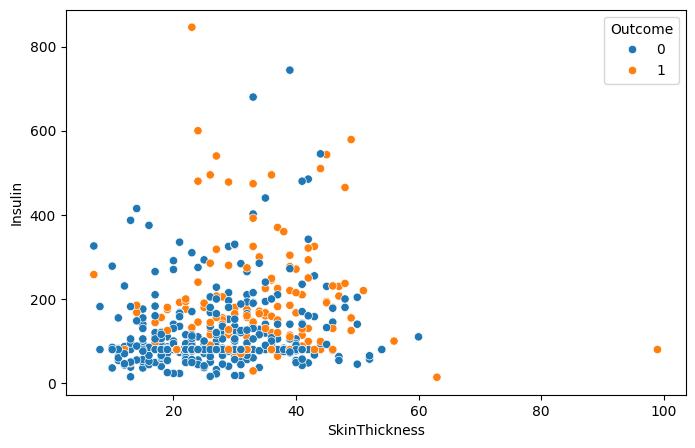

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

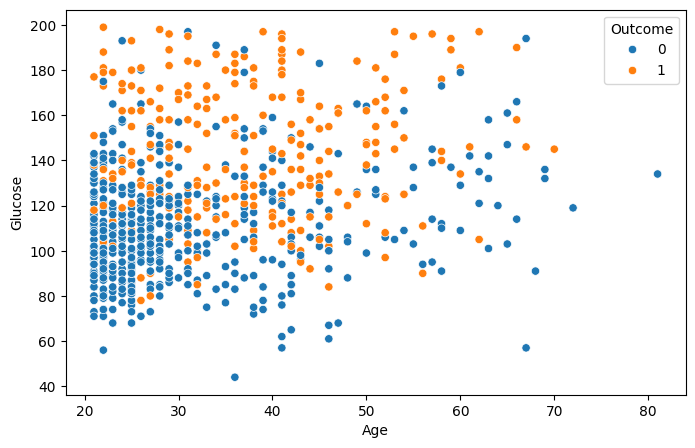

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

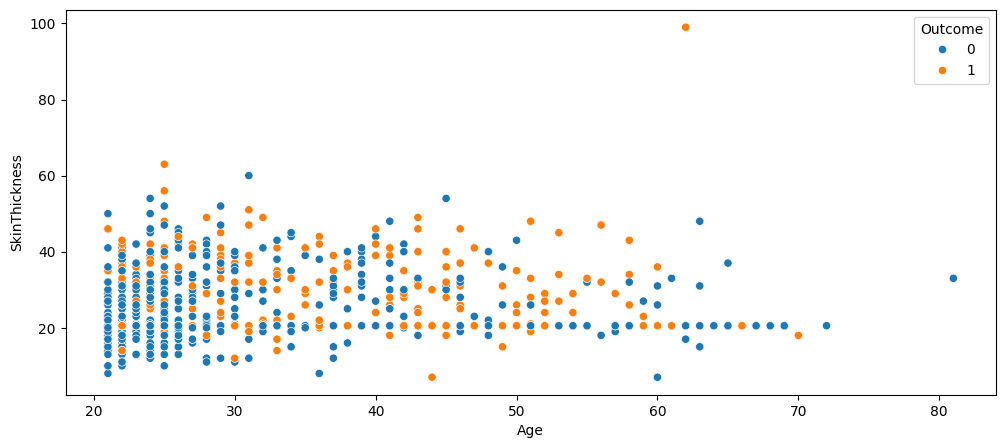

In [54]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='SkinThickness',hue='Outcome',data=data)
plt.show()

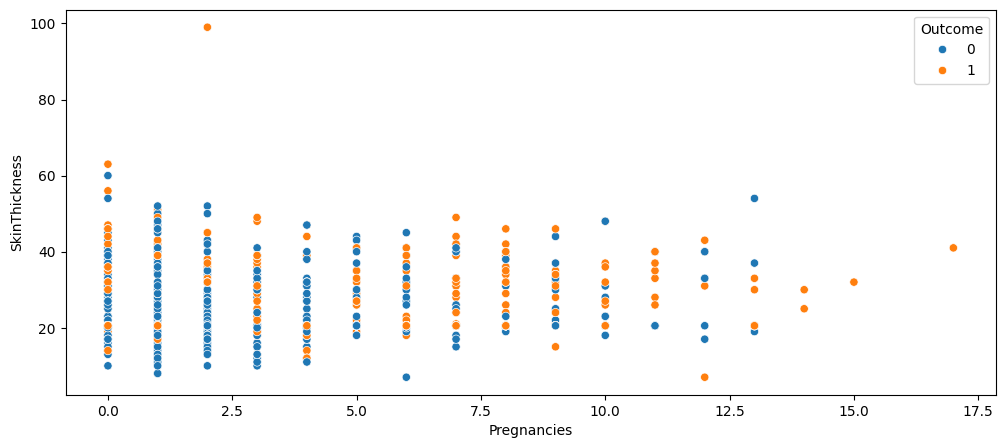

In [55]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Pregnancies',y='SkinThickness',hue='Outcome',data=data)
plt.show()

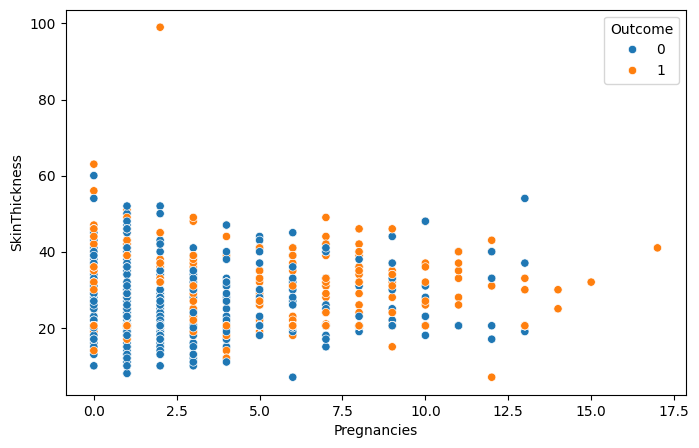

In [56]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Pregnancies',y='SkinThickness',hue='Outcome',data=data)
plt.show()

In [ ]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

Multi-Variate Analysis

Preform corrrelation analysis. Visually explore it using a heat map.

<function matplotlib.pyplot.show(close=None, block=None)>

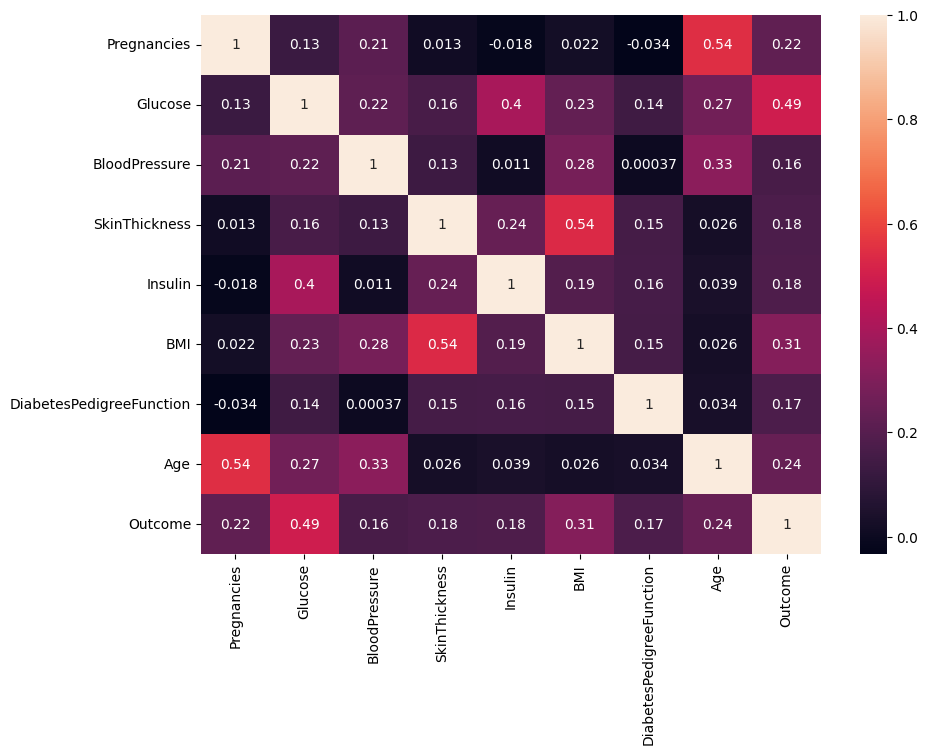

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show

Feature Selection:

In [59]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [60]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [61]:
# data preparation for modeling 
x=data.drop(['Outcome'],axis=1)
y= data.Outcome

In [62]:
#finding the correlation of every feature with the Outcome (Target Variable)
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [63]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat twi dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 10 best features

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


<function matplotlib.pyplot.show(close=None, block=None)>

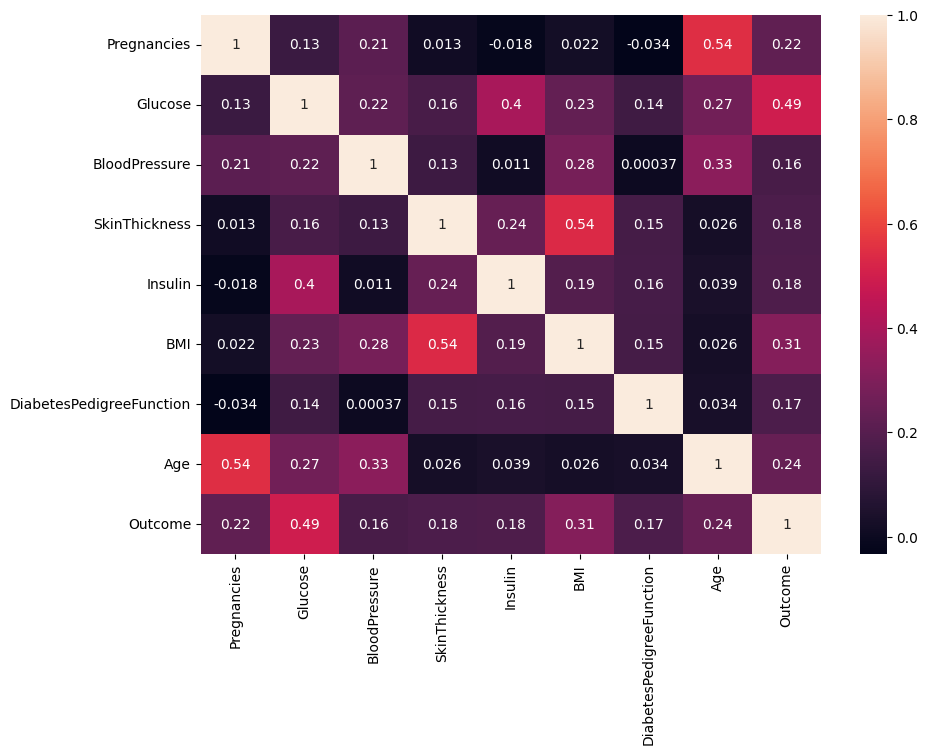

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show

[0.10588878 0.24843289 0.09550067 0.08344304 0.08103709 0.13709693
 0.11270319 0.13589743]


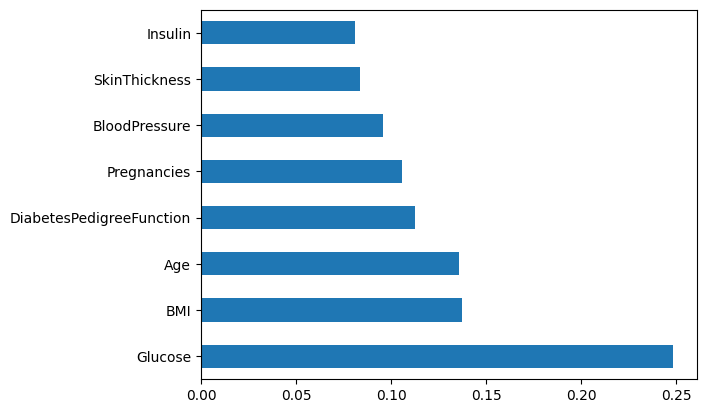

In [65]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)   #use inbuilt class feature_importances of tree based classification

#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [66]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

Train a Model

In [67]:
# Train-Test Split for Data modeling 
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.20,random_state=10)

In [68]:
print("Before OverSampling, Counts of label '1' : {}".format(sum(trainy == 1)))
print("Before OverSampling, Counts of label '0' : {} \n".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 63)
trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())
print("After OverSampling, the Shape of train_x: {}".format(trainx_res.shape))
print("After OverSampling, the Shape of train_y : {} \n".format(trainy_res.shape))

print("After OverSampling, Counts of label '1' : {}".format(sum(trainy_res == 1)))
print("After OverSampling, Counts of label '0' : {}".format(sum(trainy_res == 0)))


Before OverSampling, Counts of label '1' : 209
Before OverSampling, Counts of label '0' : 405 

After OverSampling, the Shape of train_x: (810, 7)
After OverSampling, the Shape of train_y : (810,) 

After OverSampling, Counts of label '1' : 405
After OverSampling, Counts of label '0' : 405


Model 1: Building a Logistic Regression Model

In [69]:
logreg = LogisticRegression(solver='liblinear',random_state=123)

In [70]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [71]:
prediction = logreg.predict(testx)

In [75]:
print('Accuracy_score -',accuracy_score(testy,prediction))
print('Mean_squared_error -',mean_squared_error(testy,prediction))

Accuracy_score - 0.7207792207792207
Mean_squared_error - 0.2792207792207792


In [76]:
print((confusion_matrix(testy,prediction)))

[[69 26]
 [17 42]]


In [77]:
print((classification_report(testy,prediction)))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.839


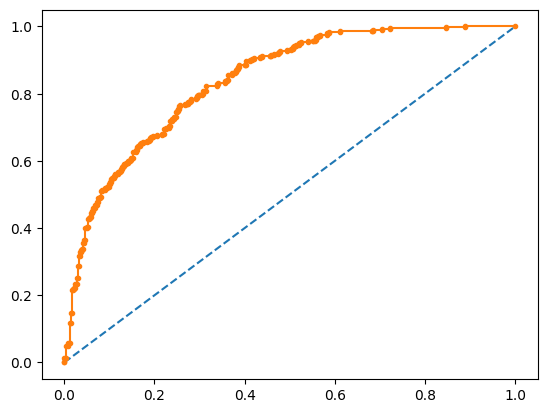

In [78]:
#preparing ROC curve (Receiver operating characteristics curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#prediction probabilities
probs = logreg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:,1]
#calculate AUC
auc = roc_auc_score(trainy_res, probs)
print("AUC: %.3f" % auc)
#calculate roc curve
fpr, tpr, threshold = roc_curve(trainy_res, probs)
#plot no skill
plt.plot([0,1], [0,1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

Model 2: RandomForestClassifier

In [81]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)

In [82]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [83]:
rf_predict = rf.predict(testx)

In [84]:
print('Accuracy_score -',accuracy_score(testy,rf_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_predict))

Accuracy_score - 0.7597402597402597
Mean_squared_error - 0.24025974025974026


RandomForestClassifier (Hyper Parameter Tunning)

In [86]:
param_grid = {'n_estimators':[100,400,200,300], 'criterion':['gini','entropy'], 'max_depth':[1,2,3], 'min_samples_split':[2,4,3], 'min_samples_leaf':[1,2,3], 'max_leaf_nodes':[1,2,3], 'max_samples':[2,4,3]}

In [87]:
grid = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, cv = 5, verbose = 2)

In [88]:
#grid.fit(trainx_res, trainy_res)

In [89]:
#grid.best_params_

In [93]:
rf_grid = RandomForestClassifier(criterion = 'gini', max_depth = 2, max_leaf_nodes = 3, max_samples= 4, min_samples_leaf= 1, min_samples_split= 3, n_estimators = 40, random_state= 42)

In [96]:
rf_grid.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=40, random_state=42)

In [98]:
rf_grid_predict = rf_grid.predict(testx)

In [99]:
print('Accuracy_score -',accuracy_score(testy,rf_grid_predict))
print('Mean_squared_error -',mean_squared_error(testy,rf_grid_predict))

Accuracy_score - 0.7207792207792207
Mean_squared_error - 0.2792207792207792


In [100]:
print((confusion_matrix(testy, prediction)))

[[69 26]
 [17 42]]


In [101]:
print(classification_report(testy, prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.939


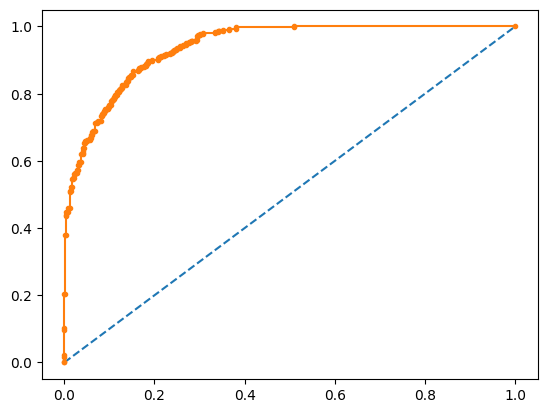

In [102]:
#preparing ROC curve (Receiver operating characteristics curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#prediction probabilities
probs = rf.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:,1]
#calculate AUC
auc = roc_auc_score(trainy_res, probs)
print("AUC: %.3f" % auc)
#calculate roc curve
fpr, tpr, threshold = roc_curve(trainy_res, probs)
#plot no skill
plt.plot([0,1], [0,1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

Model3: DecisionTreeClassifier

In [107]:
dc=DecisionTreeClassifier(random_state=42)

In [108]:
dc.fit(trainx_res, trainy_res)

DecisionTreeClassifier(random_state=42)

In [110]:
dc_pred=dc.predict(testx)

In [114]:
print("Accuracy score -",accuracy_score(testy,dc_pred))
print("Mean squared_error -",mean_squared_error(testy,dc_pred))    

Accuracy score - 0.6233766233766234
Mean squared_error - 0.37662337662337664


Decision TreeClassifier( Hyper Parameter Tunning)

In [122]:
dc_param_grid={'splitter':["best", "random"], 'criterion':['gini', 'entropy'], "max_depth":[1,2,3],'min_samples_split':[1,2,3],'min_samples_leaf': [1,2,3],'max_leaf_nodes':[1,2,3]}

In [123]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs= -1, cv= 5, verbose=2)   
dc_grid.fit(trainx_res, trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [124]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [127]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2, splitter='best', random_state=42)                                

In [128]:
dc_final.fit(trainx_res, trainy_res)
dc_final_pred = dc_final.predict(testx)

In [129]:
print("Accuracy_score -",accuracy_score(testy,dc_final_pred))
print('mean_squared_error -',mean_squared_error(testy,dc_final_pred))      

Accuracy_score - 0.6883116883116883
mean_squared_error - 0.3116883116883117


In [130]:
print((confusion_matrix(testy,dc_final_pred)))

[[73 22]
 [26 33]]


In [131]:
print((classification_report(testy, dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.792


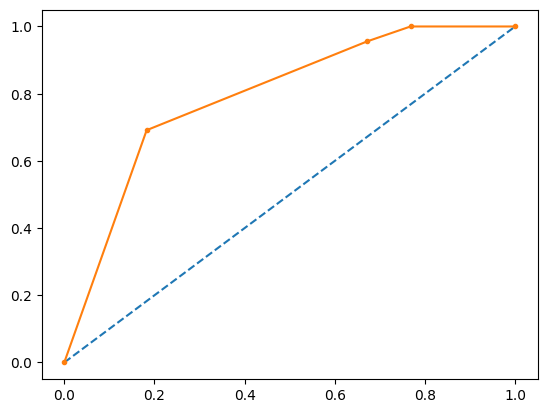

In [132]:
#preparing noc curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = dc_final.predict_proba(trainx_res)
#keep probabilities for the positive outcome only
probs = probs[:,1]
#calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
#calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()      

Model4: KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
knn=KNeighborsClassifier(n_neighbors=4)

In [136]:
knn.fit(trainx_res, trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [137]:
knn_pred = knn.predict(testx)

In [138]:
print("Accuracy_score -",accuracy_score(testy,knn_pred))
print("Mean_squared_error -",mean_squared_error(testy,knn_pred))      

Accuracy_score - 0.6233766233766234
Mean_squared_error - 0.37662337662337664


In [139]:
print((confusion_matrix(testy,knn_pred)))

[[68 27]
 [31 28]]


In [140]:
print((classification_report(testy, knn_pred)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC: 0.951


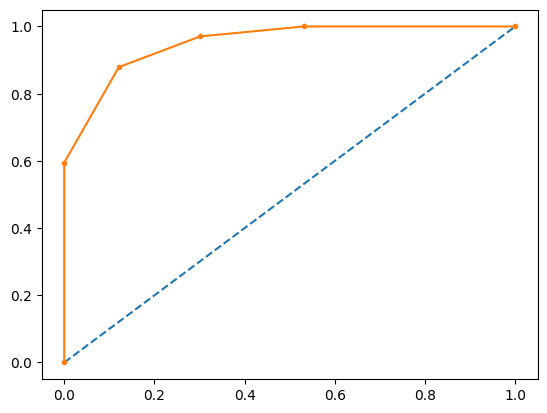

In [141]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = knn.predict_proba(trainx_res)
#keep probabilities for the positive outcome only
probs = probs[:, 1]
#calculate AUC
auc = roc_auc_score(trainy_res, probs)
print("AUC: %3.3f" % auc)
#calculate roc curve
fpr, tpr, thresholds= roc_curve(trainy_res, probs)
#plat no skil
plt.plot([0, 1], [0, 1], linestyle='--')    
#plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()  

In [146]:
Algorithms=['KNN', 'RandomForest', 'Decisiontree', 'logreg']
Accuracy_Score=[accuracy_score(testy,knn_pred), accuracy_score(testy,rf_grid_predict), accuracy_score(testy,dc_final_pred), accuracy_score(testy, prediction)]
#create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})

#Display the accuracy table
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.623377
1  RandomForest  0.720779
2  Decisiontree  0.688312
3        logreg  0.720779


Comparison of various models with the results from KNN algorithm.

In [151]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear', random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2: 'KNN', 3: "Random Forest"}
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv]

for i, model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, trainx, trainy, cv=10, scoring = 'accuracy').mean()))


Logistic Regression Test Accuracy: 0.7752247488101534
Decision Tree Test Accuracy: 0.7150713907985192
KNN Test Accuracy: 0.724616604970915
Random Forest Test Accuracy: 0.7685880486515072
